In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hello\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import chardet
with open(r'toxicity_en.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.5029417687345353,
 'language': 'Turkish'}

In [6]:
sms= pd.read_csv(r'toxicity_en.csv',encoding='utf-8')
sms.head()

,text,is_toxic
0,"Elon Musk is a piece of shit, greedy capitalis...",Toxic
1,The senile credit card shrill from Delaware ne...,Toxic
2,He does that a lot -- makes everyone look good...,Toxic
3,F*ck Lizzo,Toxic
4,Epstein and trump were best buds!!! Pedophiles...,Toxic


In [7]:
df=sms

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df.keys()

Index(['text', 'is_toxic'], dtype='object')

In [11]:
df['is_toxic']=df['is_toxic'].replace(['Toxic'], [1])
df['is_toxic']=df['is_toxic'].replace(['Not Toxic'],[0])

In [12]:
df.head()

,text,is_toxic
0,"Elon Musk is a piece of shit, greedy capitalis...",1
1,The senile credit card shrill from Delaware ne...,1
2,He does that a lot -- makes everyone look good...,1
3,F*ck Lizzo,1
4,Epstein and trump were best buds!!! Pedophiles...,1


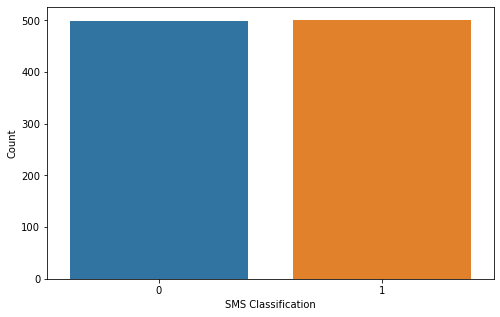

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='is_toxic', data=df)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

In [14]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.text[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y = pd.get_dummies(df['is_toxic'])
y = y.iloc[:, 1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [17]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

C:\Users\Hello\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Accuracy score for alpha=0.0 is: 83.0%
Accuracy score for alpha=0.1 is: 85.0%
Accuracy score for alpha=0.2 is: 86.5%
Accuracy score for alpha=0.3 is: 87.0%
Accuracy score for alpha=0.4 is: 87.5%
Accuracy score for alpha=0.5 is: 87.5%
Accuracy score for alpha=0.6 is: 87.5%
Accuracy score for alpha=0.7 is: 87.0%
Accuracy score for alpha=0.8 is: 87.0%
Accuracy score for alpha=0.9 is: 87.0%
Accuracy score for alpha=1.0 is: 87.0%
--------------------------------------------
The best accuracy is 87.5% with alpha value as 0.4


In [20]:
classifier = MultinomialNB(alpha=0.4)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.4)

In [21]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1
 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1
 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1
 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0]


In [41]:
def predict_spam(sample_message):
    print(sample_message)
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    
    temp = cv.transform([final_message]).toarray()
   
    k=classifier.predict(temp)
    print(k)
    return k

In [42]:
msg ="You Bitch"

if predict_spam(msg):
    print("Abusive")
else:
    print("Not Abusive")

You Bitch
[1]
Abusive


In [45]:
msg="You dont have any right to touch"
if(predict_spam(msg)):
    print("Abusive")
else:
    print("Not Abusive")

You dont have any right to touch
[1]
Abusive


In [37]:
df.head(100)

,text,is_toxic
0,"Elon Musk is a piece of shit, greedy capitalis...",1
1,The senile credit card shrill from Delaware ne...,1
2,He does that a lot -- makes everyone look good...,1
3,F*ck Lizzo,1
4,Epstein and trump were best buds!!! Pedophiles...,1
...,...,...
95,How bout plain old Stupid Fuck\n Are the stupi...,1
96,Demon Rats hate freedom !!!,1
97,"If you squint, it looks like a fat guy bending...",1
98,Allen west is a war criminal and Obama killing...,1


In [40]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()